<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
life_expectancy = pd.read_csv('/content/Life Expectancy Data.csv')
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
# Convert 'Year' column to datetime, setting January 1st as the default date for each year
life_expectancy['Year'] = pd.to_datetime(life_expectancy['Year'], format='%Y')

# Check the data type to ensure it's converted correctly
print(life_expectancy['Year'].head())
print(life_expectancy.dtypes)


0   2015-01-01
1   2014-01-01
2   2013-01-01
3   2012-01-01
4   2011-01-01
Name: Year, dtype: datetime64[ns]
Country                                    object
Year                               datetime64[ns]
Status                                     object
Life expectancy                           float64
Adult Mortality                           float64
infant deaths                               int64
Alcohol                                   float64
percentage expenditure                    float64
Hepatitis B                               float64
Measles                                     int64
 BMI                                      float64
under-five deaths                           int64
Polio                                     float64
Total expenditure                         float64
Diphtheria                                float64
 HIV/AIDS                                 float64
GDP                                       float64
Population                               

In [5]:
life_expectancy.columns = life_expectancy.columns.str.strip()

In [6]:
life_expectancy.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [7]:
#percentage of missing values
life_expectancy.isnull().sum()/life_expectancy.shape[0]*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340368
Adult Mortality,0.340368
infant deaths,0.000000
Alcohol,6.603131
percentage expenditure,0.000000
Hepatitis B,18.822328
Measles,0.000000


<Axes: >

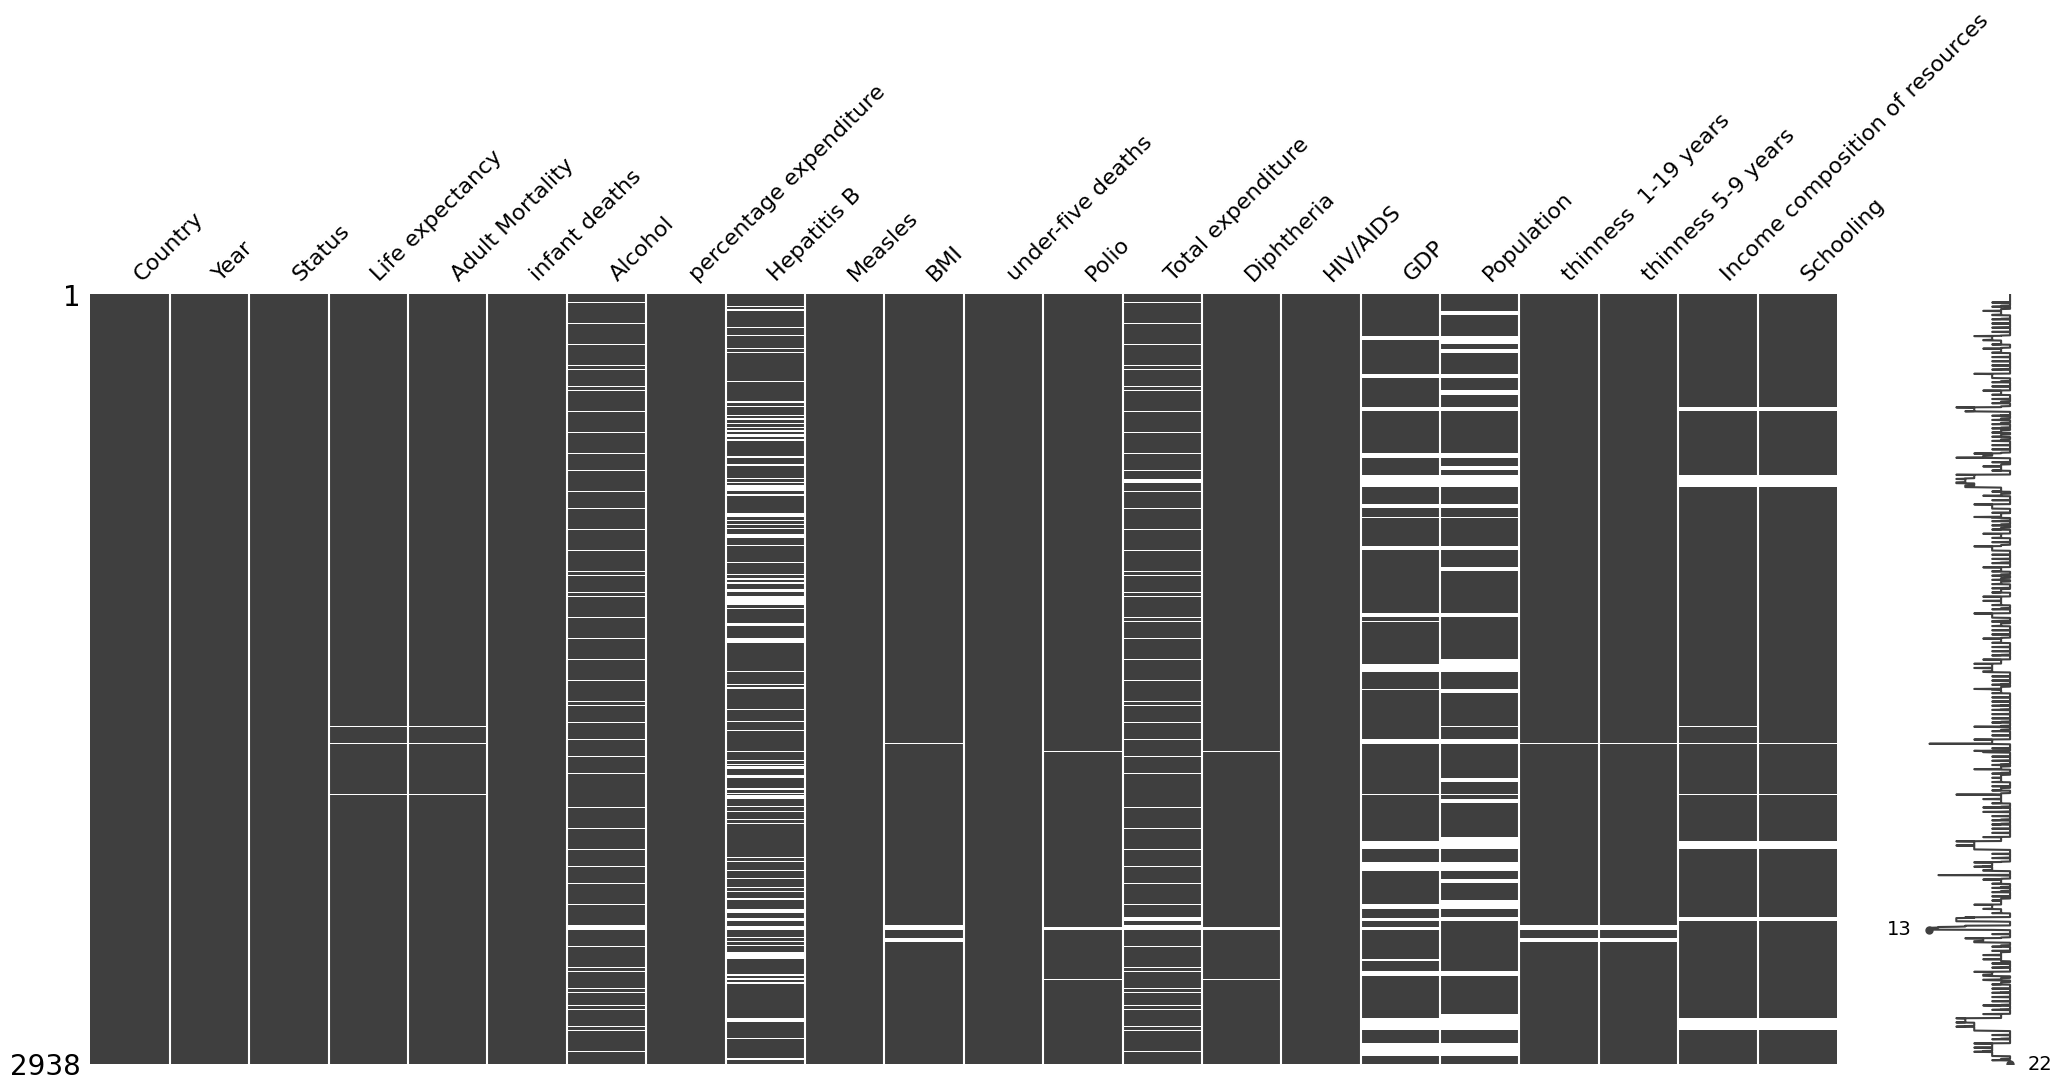

In [8]:
msno.matrix(life_expectancy)

## K-Nearest Neighbors (KNN) Imputation

In [10]:
# Filling in Life expectancy and Adult Mortality which have related missing values using
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
life_expectancy[['Life expectancy', 'Adult Mortality']] = imputer.fit_transform(life_expectancy[['Life expectancy', 'Adult Mortality']])


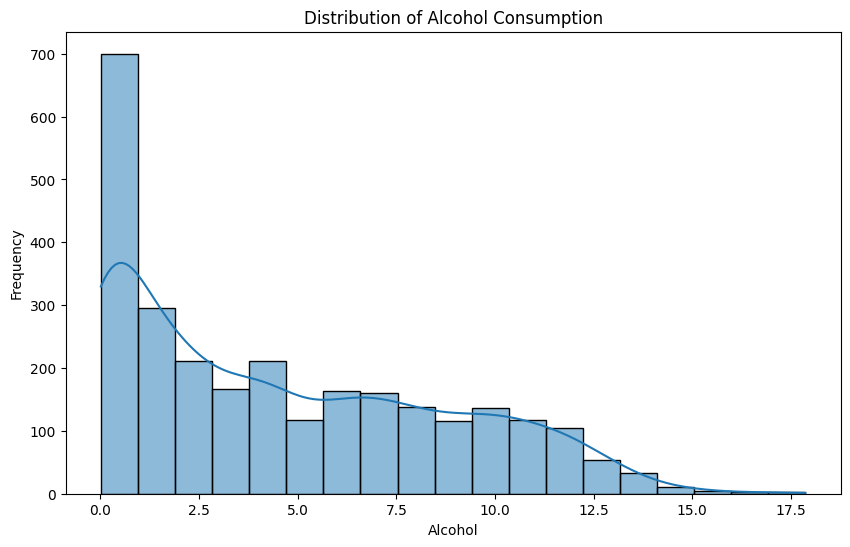

In [ ]:
#distribution of values in the Alcohol column
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy['Alcohol'], kde=True)
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()


In [11]:
median_value = life_expectancy['Alcohol'].median()
life_expectancy['Alcohol'].fillna(median_value, inplace=True)

<ipython-input-11-1637ed5b7099>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life_expectancy['Alcohol'].fillna(median_value, inplace=True)


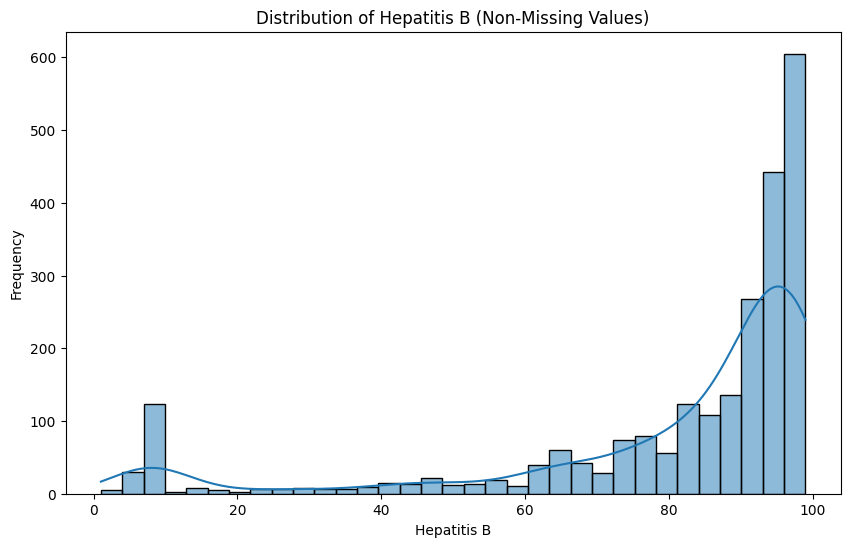

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy[life_expectancy['Hepatitis B'].notnull()]['Hepatitis B'], kde=True)
plt.title('Distribution of Hepatitis B (Non-Missing Values)')
plt.xlabel('Hepatitis B')
plt.ylabel('Frequency')
plt.show()


In [12]:
# Fill missing values in the 'Hepatitis B' column with the median
life_expectancy['Hepatitis B'].fillna(life_expectancy['Hepatitis B'].median(), inplace=True)

<ipython-input-12-da62193fa619>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life_expectancy['Hepatitis B'].fillna(life_expectancy['Hepatitis B'].median(), inplace=True)


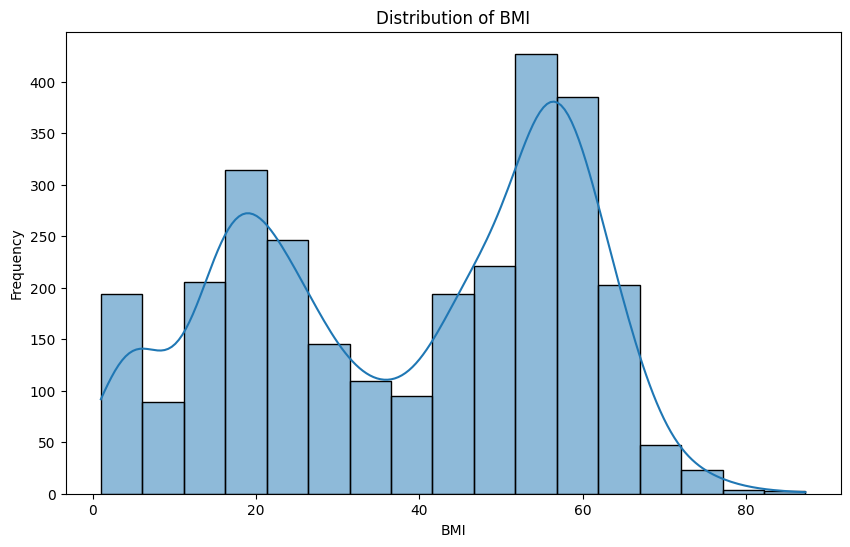

In [ ]:
#distribution of values in the BMI column
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

##Impute Missing Values for Polio, Total_expenditure, Diphtheria and BMI

In [34]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer with n_neighbors set to 5
imputer = KNNImputer(n_neighbors=5)

# Select columns for KNN imputation
columns_to_impute = ['Polio', 'Total_expenditure', 'Diphtheria', 'BMI']

# Apply KNN imputation
life_expectancy[columns_to_impute] = imputer.fit_transform(life_expectancy[columns_to_impute])

# Verify the imputation
print(life_expectancy[columns_to_impute].isnull().sum())


Polio                0
Total_expenditure    0
Diphtheria           0
BMI                  0
dtype: int64


In [32]:
#Filling in missing values for the GDP and Population columns which are related

# Initialize the KNN imputer with n_neighbors set to 5
imputer = KNNImputer(n_neighbors=5)

# Select the columns for KNN imputation
columns_to_impute = ['GDP', 'Population']

# Apply KNN imputation
life_expectancy[columns_to_impute] = imputer.fit_transform(life_expectancy[columns_to_impute])

# Verify the imputation
print(life_expectancy[columns_to_impute].isnull().sum())


GDP           0
Population    0
dtype: int64


In [ ]:
print(life_expectancy.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [25]:
# Remove leading/trailing spaces from column names
life_expectancy.columns = life_expectancy.columns.str.replace(' ', '_')

# Verify the cleaned column names
print(life_expectancy.columns)

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')


In [28]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation for the 'thinness1-19years' and 'thinness5-9years' columns
life_expectancy[['thinness_5-9_years', 'thinness__1-19_years']] = imputer.fit_transform(life_expectancy[['thinness_5-9_years', 'thinness__1-19_years']])

# Verify if missing values have been imputed
print(life_expectancy[['thinness_5-9_years', 'thinness__1-19_years']].isnull().sum())

thinness_5-9_years      0
thinness__1-19_years    0
dtype: int64


In [35]:
life_expectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Life_expectancy,0
Adult_Mortality,0
infant_deaths,0
Alcohol,0
percentage_expenditure,0
Hepatitis_B,0
Measles,0


##KNN Imputation for Income and Schooling

In [23]:
# Clean column names by stripping any extra spaces
life_expectancy.columns = life_expectancy.columns.str.strip()
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [30]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation for 'Incomecompositionofresources' and 'Schooling'
life_expectancy[['Income_composition_of_resources', 'Schooling']] = imputer.fit_transform(life_expectancy[['Income_composition_of_resources', 'Schooling']])

# Verify if missing values have been imputed
print(life_expectancy[['Income_composition_of_resources', 'Schooling']].isnull().sum())


Income_composition_of_resources    0
Schooling                          0
dtype: int64


In [37]:
total_rows = len(life_expectancy)
print("Total rows:", total_rows)

Total rows: 2938


In [38]:
# Keep the last occurrence of each duplicated row
life_expectancy = life_expectancy.drop_duplicates(keep='last')

In [39]:
total_rows = len(life_expectancy)
print("Total rows:", total_rows)

Total rows: 2938


#Exploratory Data Analysis (EDA)

In [40]:
#Statistical Summary
life_expectancy.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007-07-09 14:07:55.425459456,69.224932,164.796448,30.303948,4.546875,738.251295,83.022124,2419.592240,38.220511,42.035739,82.546988,5.942535,82.326537,1.742103,7478.865648,1.262869e+07,4.839704,4.870317,0.627108,11.992793
min,2000-01-01 00:00:00,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004-01-01 00:00:00,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.200000,0.000000,78.000000,4.320000,78.000000,0.100000,579.507175,3.978545e+05,1.600000,1.600000,0.504000,10.300000
50%,2008-01-01 00:00:00,72.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.100000,4.000000,93.000000,5.805000,93.000000,0.100000,2990.096266,2.956390e+06,3.400000,3.400000,0.662000,12.100000
75%,2012-01-01 00:00:00,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772750,14.100000
max,2015-01-01 00:00:00,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000
std,NaN,9.507640,124.080302,117.926501,3.921946,1987.914858,22.996984,11467.272489,20.009493,160.445548,23.372791,2.429562,23.651590,5.077785,13148.607368,5.410912e+07,4.394535,4.482708,0.205543,3.264381


##  Correlation
Relationships between numerical variables using correlation.

Top 5 factors most correlated with Life expectancy:
Schooling                          0.715066
Adult_Mortality                    0.696359
Income_composition_of_resources    0.690045
BMI                                0.565684
HIV/AIDS                           0.556457
Name: Life_expectancy, dtype: float64


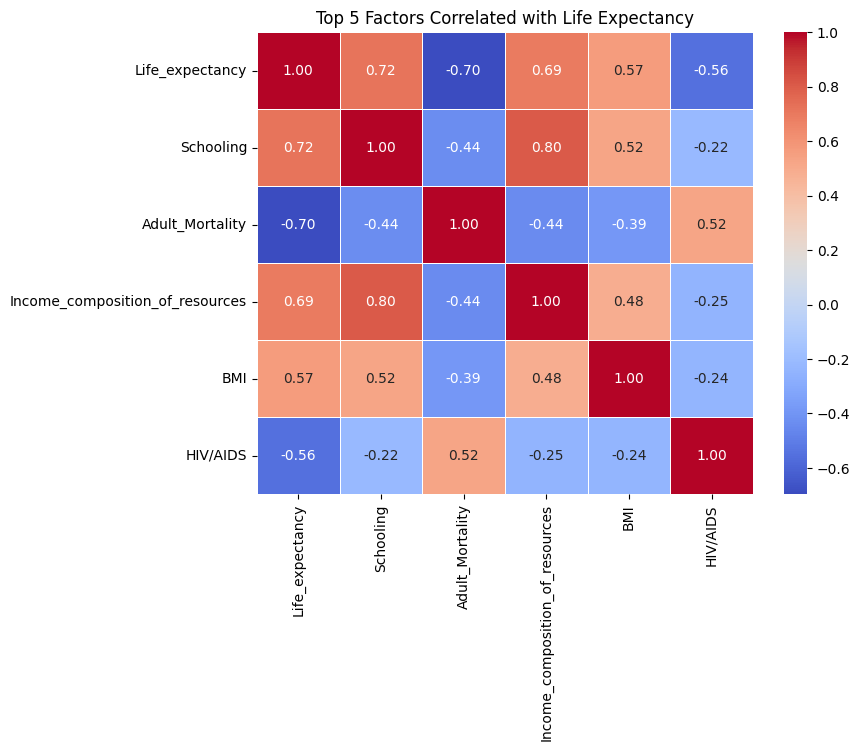

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = life_expectancy.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Identify the top 5 factors most correlated with 'Life expectancy'
top_5_factors = correlation_matrix['Life_expectancy'].abs().sort_values(ascending=False).iloc[1:6]
print("Top 5 factors most correlated with Life expectancy:")
print(top_5_factors)

# Filter correlation matrix to include only 'Life_expectancy' and the top 5 correlated factors
top_5_columns = ['Life_expectancy'] + top_5_factors.index.tolist()
top_5_correlation_matrix = correlation_matrix.loc[top_5_columns, top_5_columns]

# Plot the heatmap for the top 5 correlated features with 'Life expectancy'
plt.figure(figsize=(8, 6))
sns.heatmap(top_5_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Top 5 Factors Correlated with Life Expectancy')
plt.show()

# Data Analysis

##  Global life expectancy

In [48]:
# GeoJSON URL
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"

# Load the GeoJSON data
gdf = gpd.read_file(url)

# Display some basic information
gdf


,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,3,5,Netherlands,NL1,1,2,Country,Aruba,ABW,0,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,Admin-0 country,"POLYGON ((-69.89912 12.452, -69.8957 12.423, -..."
1,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,...,Asia,Southern Asia,South Asia,11,11,4,-99,1,Admin-0 country,"POLYGON ((74.89131 37.23164, 74.84023 37.22505..."
2,1,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,...,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,Admin-0 country,"MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5..."
3,1,6,United Kingdom,GB1,1,2,Dependency,Anguilla,AIA,0,...,Americas,Caribbean,Latin America & Caribbean,8,8,4,-99,-99,Admin-0 country,"POLYGON ((-63.00122 18.22178, -63.16001 18.171..."
4,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,Admin-0 country,"POLYGON ((20.06396 42.54727, 20.10352 42.52466..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1,4,Samoa,WSM,0,2,Sovereign country,Samoa,WSM,0,...,Oceania,Polynesia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country,"MULTIPOLYGON (((-171.4541 -14.04648, -171.7282..."
237,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,0,...,Asia,Western Asia,Middle East & North Africa,5,5,4,-99,1,Admin-0 country,"MULTIPOLYGON (((53.76318 12.63682, 53.8248 12...."
238,1,2,South Africa,ZAF,0,2,Sovereign country,South Africa,ZAF,0,...,Africa,Southern Africa,Sub-Saharan Africa,12,12,5,-99,1,Admin-0 country,"MULTIPOLYGON (((37.85693 -46.94424, 37.81396 -..."
239,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,0,...,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,Admin-0 country,"POLYGON ((32.91992 -9.40742, 32.92334 -9.43398..."


In [49]:
life_expectancy2 = life_expectancy.merge(gdf, how='inner', right_on='admin', left_on='Country')

In [50]:
dropping = ['scalerank', 'labelrank',
       'sovereignt', 'sov_a3', 'adm0_dif', 'level', 'type', 'admin', 'adm0_a3',
       'geou_dif', 'geounit', 'gu_a3', 'su_dif', 'subunit', 'su_a3',
       'brk_diff', 'name', 'name_long', 'brk_a3', 'brk_name', 'brk_group',
       'abbrev', 'postal', 'formal_en', 'formal_fr', 'note_adm0', 'note_brk',
       'name_sort', 'name_alt', 'mapcolor7', 'mapcolor8', 'mapcolor9',
       'mapcolor13', 'pop_est', 'gdp_md_est', 'pop_year', 'lastcensus',
       'gdp_year', 'economy', 'income_grp', 'wikipedia', 'fips_10', 'iso_a2',
       'iso_a3', 'iso_n3', 'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'adm0_a3_is',
       'adm0_a3_us', 'adm0_a3_un', 'adm0_a3_wb', 'continent', 'region_un',
       'subregion', 'region_wb', 'name_len', 'long_len', 'abbrev_len', 'tiny',
       'homepart', 'featureclass']

life_expectancy2.drop(columns=dropping, inplace=True)

In [51]:
life_expectancy2 = gpd.GeoDataFrame(life_expectancy2, geometry='geometry')

In [53]:
#interactive choropleth map with Plotly
fig = px.choropleth(life_expectancy2,
                    locations='Country',  # Column with country names
                    locationmode='country names',  # Use country names for matching geometries
                    color='Life_expectancy',  # Column for life expectancy
                    hover_name='Country',  # Show country names on hover
                    color_continuous_scale='viridis',  # Color scale for life expectancy
                    title='Global Life Expectancy by Country')

# Show the interactive figure
fig.show()



In [55]:
# Sort by life expectancy to get the top 10
top_10_life_expectancy = life_expectancy[['Country', 'Life_expectancy']].sort_values(by='Life_expectancy', ascending=False).head(10)
print(top_10_life_expectancy)


          Country  Life_expectancy
1850  New Zealand             89.0
915       Finland             89.0
241       Belgium             89.0
2433        Spain             89.0
2513       Sweden             89.0
995       Germany             89.0
1916       Norway             89.0
2056     Portugal             89.0
1293        Italy             89.0
937        France             89.0


In [59]:
# Lists of countries for each continent
countries_by_continent = {
    'Africa': [
        'Algeria', 'Angola', 'Egypt', 'Kenya', 'Nigeria', 'South Africa', 'Burkina Faso', 'Burundi',
        'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo',
        'Djibouti', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Lesotho',
        'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
        'Niger', 'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Togo',
        'Uganda', 'Zambia', 'Zimbabwe'
    ],
    'Asia': [
        'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China',
        'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan',
        'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lao People\'s Democratic Republic', 'Lebanon', 'Malaysia', 'Maldives',
        'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Palau', 'Philippines', 'Qatar', 'Republic of Korea', 'Saudi Arabia',
        'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
        'Uzbekistan', 'Viet Nam', 'Yemen'
    ],
    'Europe': [
        'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
        'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
        'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
        'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
        'Ukraine', 'United Kingdom of Great Britain and Northern Ireland'
    ],
    'North America': [
        'Canada', 'Mexico', 'United States of America'
    ],
    'South America': [
        'Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
        'Trinidad and Tobago', 'Uruguay', 'Venezuela (Bolivarian Republic of)'
    ],
    'Oceania': [
        'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)', 'Nauru', 'New Zealand', 'Palau',
        'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
    ]
}

# Create an empty dictionary to store results
continent_stats = {}

# Loop through each continent and calculate the average happiness score and life expectancy
for continent, countries in countries_by_continent.items():
    continent_data = life_expectancy[life_expectancy['Country'].isin(countries)]

    # Calculate the average happiness score and life expectancy
    avg_life_expectancy = continent_data['Life_expectancy'].mean()

    # Store the results in the dictionary
    continent_stats[continent] = {
        'Average Life Expectancy': avg_life_expectancy
    }

# Convert the results into a DataFrame for better visualization
continent_stats_df = pd.DataFrame(continent_stats).T
print(continent_stats_df)


               Average Life Expectancy
Africa                       58.623438
Asia                         71.008218
Europe                       77.895983
North America                78.489583
South America                72.825481
Oceania                      71.165852


In [89]:
# Calculate the number of countries for each continent
continent_country_counts = {continent: len(countries) for continent, countries in countries_by_continent.items()}

# Display the result
for continent, country_count in continent_country_counts.items():
    print(f"{continent}: {country_count} countries")

Africa: 44 countries
Asia: 47 countries
Europe: 44 countries
North America: 3 countries
South America: 13 countries
Oceania: 14 countries


In [63]:
# Assuming the 'continent_stats_df' DataFrame is already created and sorted
continent_stats_df_sorted = continent_stats_df.sort_values(by='Average Life Expectancy', ascending=False)

# Create an interactive bar plot with Plotly
fig = px.bar(continent_stats_df_sorted,
             x=continent_stats_df_sorted.index,
             y='Average Life Expectancy',
             title='Average Life Expectancy by Continent',
             labels={'Average Life Expectancy': 'Average Life Expectancy', 'index': 'Continent'})

# Show the plot
fig.show()


In [87]:
# List of North American countries
north_american_countries = ['Canada', 'Mexico', 'United States of America']

# Filter the life_expectancy DataFrame for these countries
north_american_data = life_expectancy[life_expectancy['Country'].isin(north_american_countries)]

# Remove duplicates based on the 'Country' column
north_american_data_no_duplicates = north_american_data.drop_duplicates(subset='Country')

# Display the countries and their life expectancy
print(north_american_data_no_duplicates[['Country', 'Life_expectancy']])

                       Country  Life_expectancy
496                     Canada             82.2
1683                    Mexico             76.7
2794  United States of America             79.3


In [84]:
# Remove duplicates based on the 'Country' column
life_expectancy_no_duplicates = life_expectancy.drop_duplicates(subset='Country')

# Sort the data by life expectancy in descending order and select the top 10
top_10_countries = life_expectancy_no_duplicates.sort_values(by='Life_expectancy', ascending=False).head(10)

# Create a function to get the continent for each country
def get_continent(country):
    for continent, countries in countries_by_continent.items():
        if country in countries:
            return continent
    return 'Unknown'  # In case the country is not found

# Add the continent information to the top 10 countries DataFrame
top_10_countries['Continent'] = top_10_countries['Country'].apply(get_continent)

# Display the top 10 countries with their life expectancy and continent
print(top_10_countries[['Country', 'Life_expectancy', 'Continent']])

# If you'd like to visualize the data with Plotly (interactive bar plot)
import plotly.express as px

# Create an interactive bar plot with Plotly
fig = px.bar(top_10_countries,
             x='Country',
             y='Life_expectancy',
             color='Continent',
             title='Top 10 Countries by Life Expectancy',
             labels={'Life_expectancy': 'Life Expectancy', 'Country': 'Country'},
             color_discrete_map = {
    'Africa': '#6A0DAD',    # Deep purple
    'Asia': '#4B0082',      # Indigo
    'Europe': '#4169E1',    # Royal blue
    'North America': '#4682B4',  # Steel blue
    'South America': '#5F9EA0',  # Cadet blue
    'Oceania': '#87CEFA'    # Light sky blue
})

# Show the plot
fig.show()


          Country  Life_expectancy      Continent
2345     Slovenia             88.0         Europe
737       Denmark             86.0         Europe
544         Chile             85.0  South America
673        Cyprus             85.0           Asia
1314        Japan             83.7           Asia
2521  Switzerland             83.4         Europe
2313    Singapore             83.1           Asia
2425        Spain             82.8         Europe
112     Australia             82.8        Oceania
1282        Italy             82.7         Europe


In [73]:
# Check the countries listed under Asia to make sure Singapore is included
print(countries_by_continent['Asia'])

['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Palau', 'Philippines', 'Qatar', 'Republic of Korea', 'Saudi Arabia', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen']


In [74]:
# Correct the continent dictionary to include Singapore
countries_by_continent['Asia'].append('Singapore')

In [90]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

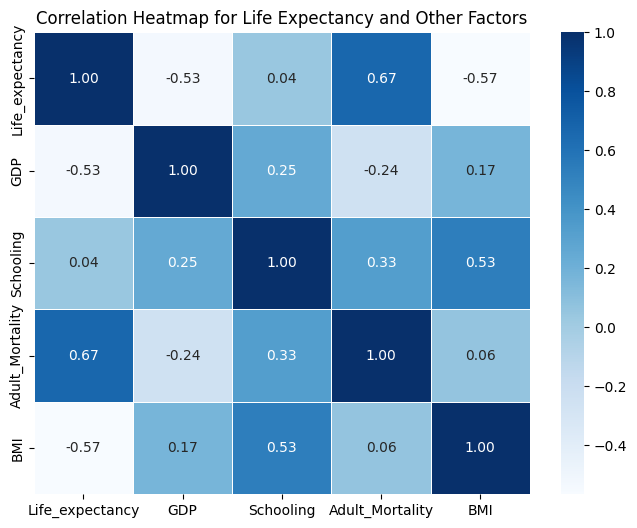

In [95]:
# Select a subset of columns to calculate the correlation
corr_data = top_10_countries_analysis[['Life_expectancy', 'GDP', 'Schooling', 'Adult_Mortality', 'BMI']].corr()

# Create a heatmap to visualize correlations between Life Expectancy and other factors
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Life Expectancy and Other Factors')
plt.show()



In [96]:
# Get the correlation values between 'Life_expectancy' and other factors
life_expectancy_corr = corr_data['Life_expectancy']

# Sort the correlations in descending order (highest to lowest)
sorted_life_expectancy_corr = life_expectancy_corr.sort_values(ascending=False)

# Display the highest correlated factors
print("Highest Correlated Factors with Life Expectancy:")
print(sorted_life_expectancy_corr)

Highest Correlated Factors with Life Expectancy:
Life_expectancy    1.000000
Adult_Mortality    0.668383
Schooling          0.040731
GDP               -0.529799
BMI               -0.565215
Name: Life_expectancy, dtype: float64


In [100]:
# Create an interactive scatter plot with Plotly and add a trendline
fig = px.scatter(top_10_countries_analysis,
                 x='Adult_Mortality',
                 y='Life_expectancy',
                 color='Country',  # Color points by country
                 title='Correlation Between Adult Mortality and Life Expectancy',
                 labels={'Adult_Mortality': 'Adult Mortality', 'Life_expectancy': 'Life Expectancy'},
                 hover_data=['Country', 'GDP', 'Schooling', 'BMI', 'HIV/AIDS'],  # Hover info
                 trendline='ols')  # Add a trendline (ordinary least squares)

# Show the plot
fig.show()


In [107]:
import plotly.express as px

# List of European countries (same as before)
european_countries = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
    'Ukraine', 'United Kingdom of Great Britain and Northern Ireland'
]

# Filter the life_expectancy dataframe to include only European countries
european_life_expectancy = life_expectancy[life_expectancy['Country'].isin(european_countries)]

# Remove duplicates based on 'Country'
european_life_expectancy = european_life_expectancy.drop_duplicates(subset='Country')

# Create an interactive scatter plot with a single trendline for all European countries
fig = px.scatter(european_life_expectancy,
                 x='Adult_Mortality',
                 y='Life_expectancy',
                 color='Country',  # Color points by country
                 title='Correlation Between Adult Mortality and Life Expectancy (European Countries)',
                 labels={'Adult_Mortality': 'Adult Mortality', 'Life_expectancy': 'Life Expectancy'},
                 hover_data=['Country', 'GDP', 'Schooling', 'BMI', 'HIV/AIDS'],  # Hover info
                 trendline='ols',  # Add a single overall trendline
                 trendline_scope='overall')  # Only one trendline for the entire dataset

# Update layout to remove grid lines
fig.update_layout(
    xaxis=dict(showgrid=False),  # Remove grid lines on x-axis
    yaxis=dict(showgrid=False)   # Remove grid lines on y-axis
)

# Show the plot
fig.show()
